In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
pf=pd.read_csv('training_set_features.csv')
pf.head()
mf=pd.read_csv('training_set_labels.csv')
mf

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [3]:
df=pd.merge(pf,mf,on='respondent_id')
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
gf=pd.read_csv('test_set_features.csv')
gf.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [6]:

df.drop(columns=['employment_industry','employment_occupation','chronic_med_condition','behavioral_avoidance','behavioral_antiviral_meds','health_worker','health_insurance','opinion_seas_sick_from_vacc','census_msa','behavioral_touch_face','behavioral_outside_home','race','behavioral_large_gatherings','behavioral_wash_hands','behavioral_face_mask','hhs_geo_region'],inplace=True,axis=1)
    
    

In [7]:
# replacing values
df['education'].replace(['< 12 Years', '12 Years','Some College','College Graduate'],
                        [0, 1,2,3], inplace=True)

df.head()


,respondent_id,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,child_under_6_months,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,...,education,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,...,0.0,Female,Below Poverty,Not Married,Own,Not in Labor Force,0.0,0.0,0,0
1,1,3.0,2.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,...,1.0,Male,Below Poverty,Not Married,Rent,Employed,0.0,0.0,0,1
2,2,1.0,1.0,NaN,NaN,0.0,3.0,1.0,1.0,4.0,...,3.0,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,3.0,3.0,5.0,5.0,...,1.0,Female,Below Poverty,Not Married,Rent,Not in Labor Force,0.0,0.0,0,1
4,4,2.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,...,2.0,Female,"<= $75,000, Above Poverty",Married,Own,Employed,1.0,0.0,0,0


In [8]:
df.education

0        0.0
1        1.0
2        3.0
3        1.0
4        2.0
        ... 
26702    2.0
26703    3.0
26704    2.0
26705    2.0
26706    2.0
Name: education, Length: 26707, dtype: float64

In [9]:

df['sex'].replace(['Male','Female'],[0,1],inplace=True)
df['income_poverty'].replace(['Below Poverty','<= $75,000, Above Poverty','> $75,000'],[0,1,2],inplace=True)
df['marital_status'].replace(['Not Married','Married'],[0,1],inplace=True)
df['rent_or_own'].replace(['Rent','Own'],[0,1],inplace=True)
df['employment_status'].replace(['Not in Labor Force','Employed','Unemployed'],[0,1,3],inplace=True)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,child_under_6_months,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,...,education,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,...,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0,0
1,1,3.0,2.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,...,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
2,2,1.0,1.0,NaN,NaN,0.0,3.0,1.0,1.0,4.0,...,3.0,0,1.0,0.0,1.0,1.0,2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,3.0,3.0,5.0,5.0,...,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,4,2.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,...,2.0,1,1.0,1.0,1.0,1.0,1.0,0.0,0,0


In [10]:
from sklearn import preprocessing 
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
df['age_group'] = label_encoder.fit_transform(df['age_group'])
df.head()


,respondent_id,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,child_under_6_months,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,...,education,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,...,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0,0
1,1,3.0,2.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,...,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
2,2,1.0,1.0,NaN,NaN,0.0,3.0,1.0,1.0,4.0,...,3.0,0,1.0,0.0,1.0,1.0,2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,3.0,3.0,5.0,5.0,...,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,4,2.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,...,2.0,1,1.0,1.0,1.0,1.0,1.0,0.0,0,0


In [11]:
df['sex'].fillna(df['sex'].mean(),inplace=True)

In [12]:
df.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge', 'doctor_recc_xyz',
       'doctor_recc_seasonal', 'child_under_6_months',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'age_group', 'education', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status',
       'household_adults', 'household_children', 'xyz_vaccine',
       'seasonal_vaccine'],
      dtype='object')

In [13]:
df=df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20087 entries, 0 to 26706
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                20087 non-null  int64  
 1   xyz_concern                  20087 non-null  float64
 2   xyz_knowledge                20087 non-null  float64
 3   doctor_recc_xyz              20087 non-null  float64
 4   doctor_recc_seasonal         20087 non-null  float64
 5   child_under_6_months         20087 non-null  float64
 6   opinion_xyz_vacc_effective   20087 non-null  float64
 7   opinion_xyz_risk             20087 non-null  float64
 8   opinion_xyz_sick_from_vacc   20087 non-null  float64
 9   opinion_seas_vacc_effective  20087 non-null  float64
 10  opinion_seas_risk            20087 non-null  float64
 11  age_group                    20087 non-null  int64  
 12  education                    20087 non-null  float64
 13  sex             

In [15]:
df.head()

,respondent_id,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,child_under_6_months,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,...,education,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,...,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0,0
1,1,3.0,2.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,...,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,3.0,3.0,5.0,5.0,...,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,4,2.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,...,2.0,1,1.0,1.0,1.0,1.0,1.0,0.0,0,0
5,5,3.0,1.0,0.0,1.0,0.0,5.0,2.0,1.0,5.0,...,1.0,0,1.0,1.0,1.0,1.0,2.0,3.0,0,0


In [16]:
gf=gf.dropna()

In [17]:
gf.drop(columns=['race','employment_industry','employment_occupation','chronic_med_condition','behavioral_avoidance','behavioral_antiviral_meds','health_worker','health_insurance','opinion_seas_sick_from_vacc','census_msa','behavioral_touch_face','behavioral_outside_home','behavioral_large_gatherings','behavioral_wash_hands','behavioral_face_mask','hhs_geo_region'],inplace=True,axis=1)
gf.head()    
    

,respondent_id,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,child_under_6_months,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,age_group,education,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children
0,26707,2.0,2.0,0.0,0.0,0.0,5.0,1.0,1.0,5.0,1.0,35 - 44 Years,College Graduate,Female,"> $75,000",Not Married,Rent,Employed,1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,18 - 34 Years,12 Years,Male,Below Poverty,Not Married,Rent,Employed,3.0,0.0
4,26711,3.0,1.0,0.0,0.0,0.0,5.0,2.0,4.0,4.0,4.0,35 - 44 Years,12 Years,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,0.0,1.0
5,26712,2.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,5.0,5.0,45 - 54 Years,College Graduate,Female,"> $75,000",Not Married,Own,Employed,0.0,2.0
11,26718,1.0,2.0,0.0,0.0,0.0,5.0,2.0,1.0,4.0,4.0,18 - 34 Years,College Graduate,Female,"> $75,000",Not Married,Own,Employed,0.0,0.0


In [18]:

gf['sex'].replace(['Male','Female'],[0,1],inplace=True)
gf['income_poverty'].replace(['Below Poverty','<= $75,000, Above Poverty','> $75,000'],[0,1,2],inplace=True)
gf['marital_status'].replace(['Not Married','Married'],[0,1],inplace=True)
gf['rent_or_own'].replace(['Rent','Own'],[0,1],inplace=True)
gf['employment_status'].replace(['Not in Labor Force','Employed','Unemployed'],[0,1,2],inplace=True)
gf['education'].replace(['< 12 Years', '12 Years','Some College','College Graduate'],
                        [0, 1,2,3], inplace=True)
gf.head()


,respondent_id,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,child_under_6_months,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,age_group,education,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children
0,26707,2.0,2.0,0.0,0.0,0.0,5.0,1.0,1.0,5.0,1.0,35 - 44 Years,3,1,2,0,0,1,1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,18 - 34 Years,1,0,0,0,0,1,3.0,0.0
4,26711,3.0,1.0,0.0,0.0,0.0,5.0,2.0,4.0,4.0,4.0,35 - 44 Years,1,1,1,0,1,1,0.0,1.0
5,26712,2.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,5.0,5.0,45 - 54 Years,3,1,2,0,1,1,0.0,2.0
11,26718,1.0,2.0,0.0,0.0,0.0,5.0,2.0,1.0,4.0,4.0,18 - 34 Years,3,1,2,0,1,1,0.0,0.0


In [19]:
from sklearn import preprocessing 
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
gf['age_group'] = label_encoder.fit_transform(gf['age_group'])
gf.head()


,respondent_id,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,child_under_6_months,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,age_group,education,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children
0,26707,2.0,2.0,0.0,0.0,0.0,5.0,1.0,1.0,5.0,1.0,1,3,1,2,0,0,1,1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,0,1,0,0,0,0,1,3.0,0.0
4,26711,3.0,1.0,0.0,0.0,0.0,5.0,2.0,4.0,4.0,4.0,1,1,1,1,0,1,1,0.0,1.0
5,26712,2.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,5.0,5.0,2,3,1,2,0,1,1,0.0,2.0
11,26718,1.0,2.0,0.0,0.0,0.0,5.0,2.0,1.0,4.0,4.0,0,3,1,2,0,1,1,0.0,0.0


In [20]:
gf.info()
gf.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6499 entries, 0 to 26704
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                6499 non-null   int64  
 1   xyz_concern                  6499 non-null   float64
 2   xyz_knowledge                6499 non-null   float64
 3   doctor_recc_xyz              6499 non-null   float64
 4   doctor_recc_seasonal         6499 non-null   float64
 5   child_under_6_months         6499 non-null   float64
 6   opinion_xyz_vacc_effective   6499 non-null   float64
 7   opinion_xyz_risk             6499 non-null   float64
 8   opinion_xyz_sick_from_vacc   6499 non-null   float64
 9   opinion_seas_vacc_effective  6499 non-null   float64
 10  opinion_seas_risk            6499 non-null   float64
 11  age_group                    6499 non-null   int64  
 12  education                    6499 non-null   int64  
 13  sex              

,respondent_id,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,child_under_6_months,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,age_group,education,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children
0,26707,2.0,2.0,0.0,0.0,0.0,5.0,1.0,1.0,5.0,1.0,1,3,1,2,0,0,1,1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,0,1,0,0,0,0,1,3.0,0.0
4,26711,3.0,1.0,0.0,0.0,0.0,5.0,2.0,4.0,4.0,4.0,1,1,1,1,0,1,1,0.0,1.0
5,26712,2.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,5.0,5.0,2,3,1,2,0,1,1,0.0,2.0
11,26718,1.0,2.0,0.0,0.0,0.0,5.0,2.0,1.0,4.0,4.0,0,3,1,2,0,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26698,53405,2.0,1.0,0.0,0.0,0.0,3.0,3.0,1.0,5.0,4.0,2,2,1,2,1,1,1,1.0,0.0
26700,53407,1.0,1.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,2.0,2,3,0,1,1,1,1,3.0,1.0
26701,53408,1.0,1.0,0.0,0.0,0.0,4.0,1.0,2.0,1.0,2.0,0,1,1,0,0,1,1,0.0,3.0
26702,53409,1.0,1.0,0.0,0.0,1.0,4.0,1.0,2.0,4.0,1.0,3,0,0,1,1,1,1,2.0,0.0


In [21]:
from sklearn.datasets import make_classification

In [22]:
X=df.iloc[:,:-2]

In [23]:
y=df['seasonal_vaccine']

In [24]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [26]:
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [27]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
df.items

<bound method DataFrame.items of        respondent_id  xyz_concern  xyz_knowledge  doctor_recc_xyz  \
0                  0          1.0            0.0              0.0   
1                  1          3.0            2.0              0.0   
3                  3          1.0            1.0              0.0   
4                  4          2.0            1.0              0.0   
5                  5          3.0            1.0              0.0   
...              ...          ...            ...              ...   
26701          26701          2.0            2.0              0.0   
26702          26702          2.0            0.0              0.0   
26703          26703          1.0            2.0              1.0   
26705          26705          1.0            1.0              0.0   
26706          26706          0.0            0.0              0.0   

       doctor_recc_seasonal  child_under_6_months  opinion_xyz_vacc_effective  \
0                       0.0                   0.0        

In [29]:
model_prob=model.predict_proba(X_test)

In [30]:
model_prob
model_prob=model_prob[:,1]

In [31]:

dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.7799583201021871


In [32]:
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)


In [33]:
thresholds

array([1.97889085, 0.97889085, 0.95868155, ..., 0.04481518, 0.04335649,
       0.02233847])

In [34]:
model_fpr,model_tpr

(array([0.        , 0.        , 0.        , ..., 0.99770203, 0.99770203,
        1.        ]),
 array([0.00000000e+00, 4.14765657e-04, 6.63625052e-03, ...,
        9.99585234e-01, 1.00000000e+00, 1.00000000e+00]))

In [35]:
import seaborn as sns

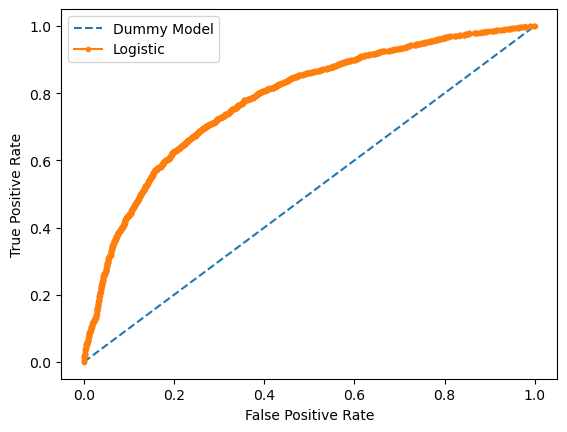

In [36]:
# plot the roc curve for the model
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


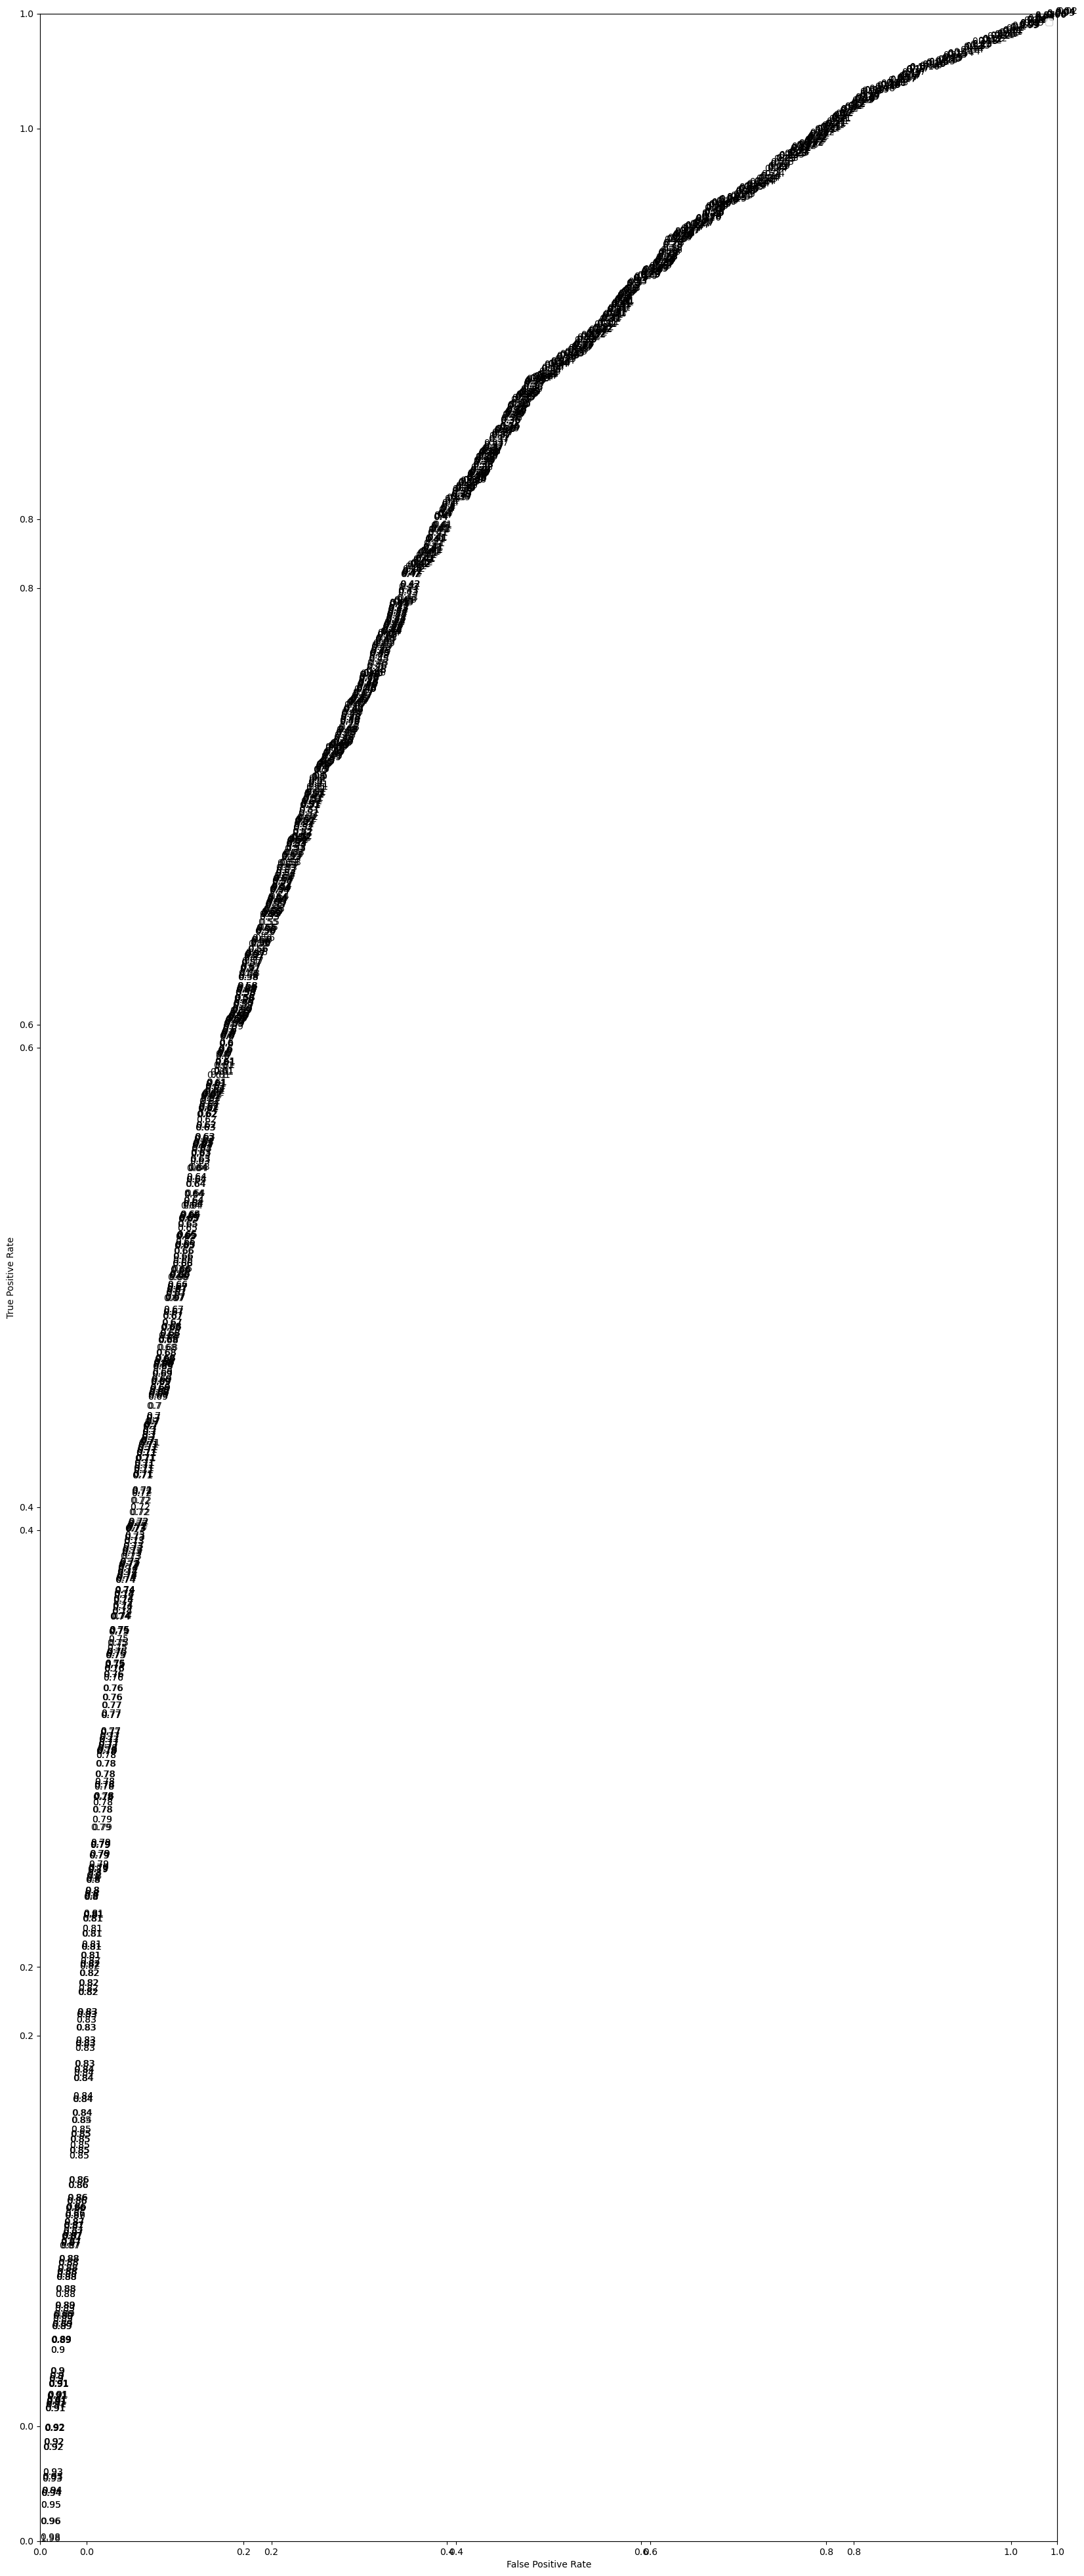

In [37]:
# plot the roc curve for the model
import numpy as np
fig = pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr,thresholds):   
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [38]:
gf.head()

,respondent_id,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,child_under_6_months,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,age_group,education,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children
0,26707,2.0,2.0,0.0,0.0,0.0,5.0,1.0,1.0,5.0,1.0,1,3,1,2,0,0,1,1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,0,1,0,0,0,0,1,3.0,0.0
4,26711,3.0,1.0,0.0,0.0,0.0,5.0,2.0,4.0,4.0,4.0,1,1,1,1,0,1,1,0.0,1.0
5,26712,2.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,5.0,5.0,2,3,1,2,0,1,1,0.0,2.0
11,26718,1.0,2.0,0.0,0.0,0.0,5.0,2.0,1.0,4.0,4.0,0,3,1,2,0,1,1,0.0,0.0


In [39]:
kf=pd.read_csv('submission_format.csv')
kf.head()
hk=pd.merge(gf,kf,on='respondent_id')
hk.head()


,respondent_id,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,child_under_6_months,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,...,education,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,26707,2.0,2.0,0.0,0.0,0.0,5.0,1.0,1.0,5.0,...,3,1,2,0,0,1,1.0,0.0,0.5,0.7
1,26708,1.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,...,1,0,0,0,0,1,3.0,0.0,0.5,0.7
2,26711,3.0,1.0,0.0,0.0,0.0,5.0,2.0,4.0,4.0,...,1,1,1,0,1,1,0.0,1.0,0.5,0.7
3,26712,2.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,5.0,...,3,1,2,0,1,1,0.0,2.0,0.5,0.7
4,26718,1.0,2.0,0.0,0.0,0.0,5.0,2.0,1.0,4.0,...,3,1,2,0,1,1,0.0,0.0,0.5,0.7


In [40]:
x_test=hk.iloc[:,:-2]

In [41]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])